In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [0]:
from pyspark.sql.functions import lit,col
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [0]:
#0 for Ukraine 1 for Russia
def judgeAff(lst):
    aff=lst[0]
    if int(float(aff))==1:
    #if aff=='1.0':
        return 1
    elif int(float(aff))==2:
    #elif aff=='2.0':
        return 2
    else:
        return 0
judgeAff_f = udf(judgeAff, IntegerType())
spark.udf.register(name="judgeAff_f", f=judgeAff_f)

Out[20]: <function __main__.judgeAff(lst)>

In [0]:
path = "dbfs:/mnt/lsde/group05/comment_position_3class/2014-10.parquet"

In [0]:
df = spark.read.load(path,format ="parquet")

In [0]:
df.show()

+---------+-------+------+-----------+
parent_id| id|result|created_utc|
+---------+-------+------+-----------+
t3_2iypr5|cl73s0x| [2.0]| 1413088170|
t3_2iypr5|cl73s4w| [2.0]| 1413088179|
t3_2iz5ga|cl73t9a| [2.0]| 1413088265|
t3_2izs3b|cl73tyd| [2.0]| 1413088322|
t3_2ixyru|cl73vwr| [2.0]| 1413088481|
t3_2j02al|cl73xyg| [0.0]| 1413088658|
t3_2itoqy|cl73yvs| [2.0]| 1413088736|
t3_2iyuv5|cl7410v| [2.0]| 1413088920|
t3_2i8om6|cl742vm| [2.0]| 1413089083|
t3_2j02al|cl746p0| [2.0]| 1413089411|
t3_2iy4hm|cl7473d| [2.0]| 1413089445|
t3_2iypr5|cl7473t| [2.0]| 1413089446|
t3_2izvb0|cl74cwm| [2.0]| 1413089942|
t3_2iyo7t|cl74d01| [2.0]| 1413089950|
t3_2iyl9n|cl74d0s| [0.0]| 1413089951|
t3_2izsgp|cl74gr9| [0.0]| 1413090274|
t3_2iyl5i|cl74hbb| [2.0]| 1413090322|
t3_2j07e7|cl74nff| [2.0]| 1413090882|
t3_2j03ti|cl74r8u| [1.0]| 1413091243|
t3_2iypr5|cl74rgq| [2.0]| 1413091262|
+---------+-------+------+-----------+
only showing top 20 rows

In [0]:
comment_path = "dbfs:/mnt/lsde/group05/filtered_comments/2014-10.parquet"

In [0]:
df_comment = spark.read.load(comment_path,format ="parquet")

In [0]:
df_comment.show()

+---------+------------------+--------------------+-------+-----+---+------------------+------------+-----------+
parent_id| author| body| id|score|ups| subreddit|subreddit_id|created_utc|
+---------+------------------+--------------------+-------+-----+---+------------------+------------+-----------+
t3_2iypr5| RelativeConcepts|pic 3 looks like ...|cl73s0x| 2| 2| funny| t5_2qh33| 1413088170|
t3_2iypr5| sqdnguns|Last pic looks li...|cl73s4w| 2| 2| funny| t5_2qh33| 1413088179|
t3_2iz5ga| Ralph_Roberts_AMA|Is the braking po...|cl73t9a| 1| 1| formula1| t5_2qimj| 1413088265|
t3_2izs3b| Rupispupis|And Youtube is fi...|cl73tyd| 1| 1| explainlikeimfive| t5_2sokd| 1413088322|
t3_2ixyru| frankc123|Ok so you can use...|cl73vwr| 2| 2| playrust| t5_2xks2| 1413088481|
t3_2j02al| lnfinity|The world has tak...|cl73xyg| 10| 10| news| t5_2qh3l| 1413088658|
t3_2itoqy| gogis79|[Hollywood worthy...|cl73yvs| 1| 1| russia| t5_2qh75| 1413088736|
t3_2iyuv5|gossypium_hirsutum|Can somebody expl...|cl7410v| 2| 2| gifs| t5_2qt55| 1413088920|
t3_2i8om6| somyusernamewas|Got the club blow...|cl742vm| 1| 1|UnexpectedThugLife| t5_33uma| 1413089083|
t3_2j02al| Rompclown|What I haven't he...|cl746p0| 8| 8| news| t5_2qh3l| 1413089411|
t3_2iy4hm| Uzaka|Even in the US if...|cl7473d| 1| 1|ANormalDayInRussia| t5_2z166| 1413089445|
t3_2iypr5| M8asonmiller|People are afraid...|cl7473t| 1| 1| funny| t5_2qh33| 1413089446|
t3_2izvb0| Teyanis|Only test drove i...|cl74cwm| 7| 7| Warthunder| t5_2uc6j| 1413089942|
t3_2iyo7t| michaelconfoy|Would they soon b...|cl74d01| 1| 1| WarshipPorn| t5_2tg3p| 1413089950|
t3_2iyl9n| Kinggeorgethe3rd|Seriously these p...|cl74d0s| 4| 4| AdviceAnimals| t5_2s7tt| 1413089951|
t3_2izsgp| Kierik|Putin "Order the ...|cl74gr9| 5| 5| UkrainianConflict| t5_30hhs| 1413090274|
t3_2iyl5i| Nomics|I don't think you...|cl74hbb| 2| 2| worldpolitics| t5_2qh9a| 1413090322|
t3_2j07e7| BluePhilly1| Well....it works...|cl74nff| 4| 4| WTF| t5_2qh61| 1413090882|
t3_2j03ti| just1bastard|Oh well!\n\nAmeri...|cl74r8u| 9| 9| UkrainianConflict| t5_30hhs| 1413091243|
t3_2iypr5| Joklahoma|At first I though...|cl74rgq| 1| 1| funny| t5_2qh33| 1413091262|
+---------+------------------+--------------------+-------+-----+---+------------------+------------+-----------+
only showing top 20 rows

In [0]:
tmp=df.join(df_comment,"id").select(df.id,'result','author','subreddit').withColumn('date',lit('2014-10'))#.withColumn('label',judgeAff('result'))
tmp.show()

+-------+------+------------------+------------------+-------+
 id|result| author| subreddit| date|
+-------+------+------------------+------------------+-------+
cl73s0x| [2.0]| RelativeConcepts| funny|2014-10|
cl73s4w| [2.0]| sqdnguns| funny|2014-10|
cl73t9a| [2.0]| Ralph_Roberts_AMA| formula1|2014-10|
cl73tyd| [2.0]| Rupispupis| explainlikeimfive|2014-10|
cl73vwr| [2.0]| frankc123| playrust|2014-10|
cl73xyg| [0.0]| lnfinity| news|2014-10|
cl73yvs| [2.0]| gogis79| russia|2014-10|
cl7410v| [2.0]|gossypium_hirsutum| gifs|2014-10|
cl742vm| [2.0]| somyusernamewas|UnexpectedThugLife|2014-10|
cl746p0| [2.0]| Rompclown| news|2014-10|
cl7473d| [2.0]| Uzaka|ANormalDayInRussia|2014-10|
cl7473t| [2.0]| M8asonmiller| funny|2014-10|
cl74cwm| [2.0]| Teyanis| Warthunder|2014-10|
cl74d01| [2.0]| michaelconfoy| WarshipPorn|2014-10|
cl74d0s| [0.0]| Kinggeorgethe3rd| AdviceAnimals|2014-10|
cl74gr9| [0.0]| Kierik| UkrainianConflict|2014-10|
cl74hbb| [2.0]| Nomics| worldpolitics|2014-10|
cl74nff| [2.0]| BluePhilly1| WTF|2014-10|
cl74r8u| [1.0]| just1bastard| UkrainianConflict|2014-10|
cl74rgq| [2.0]| Joklahoma| funny|2014-10|
+-------+------+------------------+------------------+-------+
only showing top 20 rows

In [0]:
tmp.withColumn('label',judgeAff_f('result')).filter(col('label')==2).show()

+-------+------+------------------+------------------+-------+-----+
 id|result| author| subreddit| date|label|
+-------+------+------------------+------------------+-------+-----+
cl73s0x| [2.0]| RelativeConcepts| funny|2014-10| 2|
cl73s4w| [2.0]| sqdnguns| funny|2014-10| 2|
cl73t9a| [2.0]| Ralph_Roberts_AMA| formula1|2014-10| 2|
cl73tyd| [2.0]| Rupispupis| explainlikeimfive|2014-10| 2|
cl73vwr| [2.0]| frankc123| playrust|2014-10| 2|
cl73yvs| [2.0]| gogis79| russia|2014-10| 2|
cl7410v| [2.0]|gossypium_hirsutum| gifs|2014-10| 2|
cl742vm| [2.0]| somyusernamewas|UnexpectedThugLife|2014-10| 2|
cl746p0| [2.0]| Rompclown| news|2014-10| 2|
cl7473d| [2.0]| Uzaka|ANormalDayInRussia|2014-10| 2|
cl7473t| [2.0]| M8asonmiller| funny|2014-10| 2|
cl74cwm| [2.0]| Teyanis| Warthunder|2014-10| 2|
cl74d01| [2.0]| michaelconfoy| WarshipPorn|2014-10| 2|
cl74hbb| [2.0]| Nomics| worldpolitics|2014-10| 2|
cl74nff| [2.0]| BluePhilly1| WTF|2014-10| 2|
cl74rgq| [2.0]| Joklahoma| funny|2014-10| 2|
cl74si8| [2.0]| ModerationLog| ModerationLog|2014-10| 2|
cl74sjm| [2.0]| ModerationLog| POLITIC|2014-10| 2|
cl74xg1| [2.0]| bagood1| ScenesFromAHat|2014-10| 2|
cl74xi2| [2.0]| PigEqualsBakon| funny|2014-10| 2|
+-------+------+------------------+------------------+-------+-----+
only showing top 20 rows

In [0]:
data_path = "/mnt/lsde/group05/" + "comments_sentiment/" + str(year) + "-" + month_literal + ".parquet"
data_path1= "/mnt/lsde/group05/" + "kwfilter_top3/" + str(year) + "-" + month_literal + ".parquet"

In [0]:
def handle_comments(year_range = [2015, 2016, 2017], month_range = range(1, 13),tag=0):
    df_result = None
    for year in year_range:
        
        for month in month_range:
            
            month_literal = str(month)
            data_path = "/mnt/lsde/group05/comment_position_3class/" + str(year) + "-" + month_literal + ".parquet"
            print("start handling "+str(year) + "-" + month_literal)
            df =spark.read.load(data_path,format="parquet")
            data_path1="/mnt/lsde/group05/filtered_comments/" + str(year) + "-" + month_literal + ".parquet"
            df_comment = spark.read.load(data_path1,format ="parquet")
            tmp=df.join(df_comment,"id").select(df.id,'result','author','subreddit').withColumn('date',lit(str(year) + "-" + month_literal)).withColumn('label',judgeAff_f('result'))
            if tag==0:
                tmp = tmp.filter(col('label')==0)
            else :
                tmp = tmp.filter(col('label')==1)
            if df_result is None:
                df_result = tmp
            else:
                df_result = df_result.union(tmp)
            print("finish handling "+str(year) + "-" + month_literal)
    return df_result

In [0]:
comment_2014_Uk = handle_comments([2014],range(2,13),0)

start handling 2014-2
finish handling 2014-2
start handling 2014-3
finish handling 2014-3
start handling 2014-4
finish handling 2014-4
start handling 2014-5
finish handling 2014-5
start handling 2014-6
finish handling 2014-6
start handling 2014-7
finish handling 2014-7
start handling 2014-8
finish handling 2014-8
start handling 2014-9
finish handling 2014-9
start handling 2014-10
finish handling 2014-10
start handling 2014-11
finish handling 2014-11
start handling 2014-12
finish handling 2014-12

In [0]:
comment_2014_Uk.show()

+-------+------+----------------+----------+------+-----+
 id|result| author| subreddit| date|label|
+-------+------+----------------+----------+------+-----+
cflk4rf| [0.0]| gosnomad| worldnews|2014-2| 0|
cflk61j| [0.0]| doorhandle12| AskReddit|2014-2| 0|
cflkwtt| [0.0]| RayBrower| pics|2014-2| 0|
cfll83u| [0.0]| zacharymrtn| civ|2014-2| 0|
cflliaz| [0.0]| gearhead454| pics|2014-2| 0|
cfllrnq| [0.0]| poochan| pics|2014-2| 0|
cfllu2v| [0.0]| putupyourdukes| worldnews|2014-2| 0|
cfllxvq| [0.0]| Tahoe22|euromaidan|2014-2| 0|
cflm03s| [0.0]| thiswhiteboy| pics|2014-2| 0|
cflnec6| [0.0]|rubberchicken281| pics|2014-2| 0|
cflnvo2| [0.0]| Time_Alter| olympics|2014-2| 0|
cflo73i| [0.0]| BuiltFjordTough| civ|2014-2| 0|
cflocym| [0.0]| makingtea| worldnews|2014-2| 0|
cfloggd| [0.0]| CrackersII| ainbow|2014-2| 0|
cflovf3| [0.0]| makingtea|euromaidan|2014-2| 0|
cfloy4p| [0.0]| makingtea|euromaidan|2014-2| 0|
cflp6au| [0.0]| shpadoinkle92|euromaidan|2014-2| 0|
cflpd37| [0.0]| makingtea|euromaidan|2014-2| 0|
cflplva| [0.0]| Silent-Scope|euromaidan|2014-2| 0|
cflplxk| [0.0]| makingtea|euromaidan|2014-2| 0|
+-------+------+----------------+----------+------+-----+
only showing top 20 rows

In [0]:
comment_from2015_Uk = handle_comments(range(2015,2022),range(1,13),0)

start handling 2015-1
finish handling 2015-1
start handling 2015-2
finish handling 2015-2
start handling 2015-3
finish handling 2015-3
start handling 2015-4
finish handling 2015-4
start handling 2015-5
finish handling 2015-5
start handling 2015-6
finish handling 2015-6
start handling 2015-7
finish handling 2015-7
start handling 2015-8
finish handling 2015-8
start handling 2015-9
finish handling 2015-9
start handling 2015-10
finish handling 2015-10
start handling 2015-11
finish handling 2015-11
start handling 2015-12
finish handling 2015-12
start handling 2016-1
finish handling 2016-1
start handling 2016-2
finish handling 2016-2
start handling 2016-3
finish handling 2016-3
start handling 2016-4
finish handling 2016-4
start handling 2016-5
finish handling 2016-5
start handling 2016-6
finish handling 2016-6
start handling 2016-7
finish handling 2016-7
start handling 2016-8
finish handling 2016-8
start handling 2016-9
finish handling 2016-9
start handling 2016-10
finish handling 2016-10
start handling 2016-11
finish handling 2016-11
start handling 2016-12
finish handling 2016-12
start handling 2017-1
finish handling 2017-1
start handling 2017-2
finish handling 2017-2
start handling 2017-3
finish handling 2017-3
start handling 2017-4
finish handling 2017-4
start handling 2017-5
finish handling 2017-5
start handling 2017-6
finish handling 2017-6
start handling 2017-7
finish handling 2017-7
start handling 2017-8
finish handling 2017-8
start handling 2017-9
finish handling 2017-9
start handling 2017-10
finish handling 2017-10
start handling 2017-11
finish handling 2017-11
start handling 2017-12
finish handling 2017-12
start handling 2018-1
finish handling 2018-1
start handling 2018-2
finish handling 2018-2
start handling 2018-3
finish handling 2018-3
start handling 2018-4
finish handling 2018-4
start handling 2018-5
finish handling 2018-5
start handling 2018-6
finish handling 2018-6
start handling 2018-7
finish handling 2018-7
start handling 2018-8
finish handling 2018-8
start handling 2018-9
finish handling 2018-9
start handling 2018-10
finish handling 2018-10
start handling 2018-11
finish handling 2018-11
start handling 2018-12
finish handling 2018-12
start handling 2019-1
finish handling 2019-1
start handling 2019-2
finish handling 2019-2
start handling 2019-3
finish handling 2019-3
start handling 2019-4
finish handling 2019-4
start handling 2019-5
finish handling 2019-5
start handling 2019-6
finish handling 2019-6
start handling 2019-7
finish handling 2019-7
start handling 2019-8
finish handling 2019-8
start handling 2019-9
finish handling 2019-9
start handling 2019-10
finish handling 2019-10
start handling 2019-11
finish handling 2019-11
start handling 2019-12
finish handling 2019-12
start handling 2020-1
finish handling 2020-1
start handling 2020-2
finish handling 2020-2
start handling 2020-3
finish handling 2020-3
start handling 2020-4
finish handling 2020-4
start handling 2020-5
finish handling 2020-5
start handling 2020-6
finish handling 2020-6
start handling 2020-7
finish handling 2020-7
start handling 2020-8
finish handling 2020-8
start handling 2020-9
finish handling 2020-9
start handling 2020-10
finish handling 2020-10
start handling 2020-11
finish handling 2020-11
start handling 2020-12
finish handling 2020-12
start handling 2021-1
finish handling 2021-1
start handling 2021-2
finish handling 2021-2
start handling 2021-3
finish handling 2021-3
start handling 2021-4
finish handling 2021-4
start handling 2021-5
finish handling 2021-5
start handling 2021-6
finish handling 2021-6
start handling 2021-7
finish handling 2021-7
start handling 2021-8
finish handling 2021-8
start handling 2021-9
finish handling 2021-9
start handling 2021-10
finish handling 2021-10
start handling 2021-11
finish handling 2021-11
start handling 2021-12
finish handling 2021-12

In [0]:
comment_2022_Uk = handle_comments([2022],range(1,9),0)

start handling 2022-1
finish handling 2022-1
start handling 2022-2
finish handling 2022-2
start handling 2022-3
finish handling 2022-3
start handling 2022-4
finish handling 2022-4
start handling 2022-5
finish handling 2022-5
start handling 2022-6
finish handling 2022-6
start handling 2022-7
finish handling 2022-7
start handling 2022-8
finish handling 2022-8

In [0]:
comment_Uk=comment_2014_Uk.union(comment_from2015_Uk).union(comment_2022_Uk)
comment_Uk.show()

+-------+------+----------------+----------+------+-----+
 id|result| author| subreddit| date|label|
+-------+------+----------------+----------+------+-----+
cflk4rf| [0.0]| gosnomad| worldnews|2014-2| 0|
cflk61j| [0.0]| doorhandle12| AskReddit|2014-2| 0|
cflkwtt| [0.0]| RayBrower| pics|2014-2| 0|
cfll83u| [0.0]| zacharymrtn| civ|2014-2| 0|
cflliaz| [0.0]| gearhead454| pics|2014-2| 0|
cfllrnq| [0.0]| poochan| pics|2014-2| 0|
cfllu2v| [0.0]| putupyourdukes| worldnews|2014-2| 0|
cfllxvq| [0.0]| Tahoe22|euromaidan|2014-2| 0|
cflm03s| [0.0]| thiswhiteboy| pics|2014-2| 0|
cflnec6| [0.0]|rubberchicken281| pics|2014-2| 0|
cflnvo2| [0.0]| Time_Alter| olympics|2014-2| 0|
cflo73i| [0.0]| BuiltFjordTough| civ|2014-2| 0|
cflocym| [0.0]| makingtea| worldnews|2014-2| 0|
cfloggd| [0.0]| CrackersII| ainbow|2014-2| 0|
cflovf3| [0.0]| makingtea|euromaidan|2014-2| 0|
cfloy4p| [0.0]| makingtea|euromaidan|2014-2| 0|
cflp6au| [0.0]| shpadoinkle92|euromaidan|2014-2| 0|
cflpd37| [0.0]| makingtea|euromaidan|2014-2| 0|
cflplva| [0.0]| Silent-Scope|euromaidan|2014-2| 0|
cflplxk| [0.0]| makingtea|euromaidan|2014-2| 0|
+-------+------+----------------+----------+------+-----+
only showing top 20 rows

In [0]:
comment_Uk.write.mode("overwrite").format("parquet").save("/mnt/lsde/group05/political_standpoint/comment_Uk.parquet")

In [0]:
comment_Uk.groupBy('author').agg(F.count('id').alias('author_count')).show()

+-------------------+------------+
 author|author_count|
+-------------------+------------+
nihil_novi_sub_sole| 1|
 victor59fifty| 1|
 Kozish| 1|
 frostyboy500| 9|
 WarriorHealer| 3|
 rascalnag| 3|
 B0P0H4| 1|
 blueburritto| 1|
 Hnew92| 1|
 trilateral_agent| 2|
 DethBreth| 1|
 McGuineaRI| 6|
 alexro| 1|
 Turdtastic| 1|
 Chafed_HotDog| 1|
 dildoballs| 1|
 Pericorp| 2|
 ineedmoresleep| 56|
 bondpat| 1|
 ZedFish| 1|
+-------------------+------------+
only showing top 20 rows

In [0]:
comment_Uk.groupBy('subreddit').agg(F.count('id').alias('author_count')).show()

In [0]:
def handle_submissions(year_range = [2015, 2016, 2017], month_range = range(1, 13),tag=0):
    df_result = None
    for year in year_range:
        
        for month in month_range:
            
            month_literal = str(month)
            data_path = "/mnt/lsde/group05/submission_position_3class/" + str(year) + "-" + month_literal + ".parquet"
            print("start handling "+str(year) + "-" + month_literal)
            df =spark.read.load(data_path,format="parquet")
            data_path1="/mnt/lsde/group05/kwfilter_top3/" + str(year) + "-" + month_literal + ".parquet"
            df_comment = spark.read.load(data_path1,format ="parquet")
            tmp=df.join(df_comment,"id").select(df.id,'result','author','subreddit').withColumn('date',lit(str(year) + "-" + month_literal)).withColumn('label',judgeAff_f('result'))
            if tag==0:
                tmp = tmp.filter(col('label')==0)
            else :
                tmp = tmp.filter(col('label')==1)
            if df_result is None:
                df_result = tmp
            else:
                df_result = df_result.union(tmp)
            print("finish handling "+str(year) + "-" + month_literal)
    return df_result

In [0]:
submission_2014_Uk = handle_submissions([2014],range(2,13),0)

start handling 2014-2
finish handling 2014-2
start handling 2014-3
finish handling 2014-3
start handling 2014-4
finish handling 2014-4
start handling 2014-5
finish handling 2014-5
start handling 2014-6
finish handling 2014-6
start handling 2014-7
finish handling 2014-7
start handling 2014-8
finish handling 2014-8
start handling 2014-9
finish handling 2014-9
start handling 2014-10
finish handling 2014-10
start handling 2014-11
finish handling 2014-11
start handling 2014-12
finish handling 2014-12

In [0]:
submission_2014_Uk.show()

+------+------+---------------+-----------------+------+-----+
 id|result| author| subreddit| date|label|
+------+------+---------------+-----------------+------+-----+
1z0rpe| [0.0]| Grahar64| MapPorn|2014-2| 0|
1z0sib| [0.0]| thickeningdick| dadjokes|2014-2| 0|
1z0sq6| [0.0]| SidNSFW| googlenewsfeed|2014-2| 0|
1z0tys| [0.0]| Redhawk1000| conspiracy|2014-2| 0|
1z0uai| [0.0]| Redhawk1000| MapPorn|2014-2| 0|
1z0ujj| [0.0]| rotoreuters| betternews|2014-2| 0|
1z0v1n| [0.0]| Redhawk1000| worldpolitics|2014-2| 0|
1z0vd8| [0.0]| Sybles| worldnews|2014-2| 0|
1z0wtp| [0.0]| samurai84| Documentaries|2014-2| 0|
1z0xit| [0.0]| fringebot5001| fringediscussion|2014-2| 0|
1z0y3y| [0.0]| nimobo| worldnews|2014-2| 0|
1z0ymf| [0.0]|WorldNewsToday3| news|2014-2| 0|
1z0yzc| [0.0]| laymanaffairs| worldnews|2014-2| 0|
1z10ww| [0.0]| rotoreuters| betternews|2014-2| 0|
1z10z7| [0.0]| fringebot5001| fringediscussion|2014-2| 0|
1z1150| [0.0]|sovietartrussia| ukraine|2014-2| 0|
1z11sm| [0.0]| liloadventures| AdviceAnimals|2014-2| 0|
1z12z8| [0.0]| uptodatepronto|UkrainianConflict|2014-2| 0|
1z13i2| [0.0]| denis6669| funny|2014-2| 0|
1z13rb| [0.0]| rssr| test16|2014-2| 0|
+------+------+---------------+-----------------+------+-----+
only showing top 20 rows

In [0]:
submission_from2015_Uk = handle_submissions(range(2015,2022),range(1,13),0)

start handling 2015-1
finish handling 2015-1
start handling 2015-2
finish handling 2015-2
start handling 2015-3
finish handling 2015-3
start handling 2015-4
finish handling 2015-4
start handling 2015-5
finish handling 2015-5
start handling 2015-6
finish handling 2015-6
start handling 2015-7
finish handling 2015-7
start handling 2015-8
finish handling 2015-8
start handling 2015-9
finish handling 2015-9
start handling 2015-10
finish handling 2015-10
start handling 2015-11
finish handling 2015-11
start handling 2015-12
finish handling 2015-12
start handling 2016-1
finish handling 2016-1
start handling 2016-2
finish handling 2016-2
start handling 2016-3
finish handling 2016-3
start handling 2016-4
finish handling 2016-4
start handling 2016-5
finish handling 2016-5
start handling 2016-6
finish handling 2016-6
start handling 2016-7
finish handling 2016-7
start handling 2016-8
finish handling 2016-8
start handling 2016-9
finish handling 2016-9
start handling 2016-10
finish handling 2016-10
start handling 2016-11
finish handling 2016-11
start handling 2016-12
finish handling 2016-12
start handling 2017-1
finish handling 2017-1
start handling 2017-2
finish handling 2017-2
start handling 2017-3
finish handling 2017-3
start handling 2017-4
finish handling 2017-4
start handling 2017-5
finish handling 2017-5
start handling 2017-6
finish handling 2017-6
start handling 2017-7
finish handling 2017-7
start handling 2017-8
finish handling 2017-8
start handling 2017-9
finish handling 2017-9
start handling 2017-10
finish handling 2017-10
start handling 2017-11
finish handling 2017-11
start handling 2017-12
finish handling 2017-12
start handling 2018-1
finish handling 2018-1
start handling 2018-2
finish handling 2018-2
start handling 2018-3
finish handling 2018-3
start handling 2018-4
finish handling 2018-4
start handling 2018-5
finish handling 2018-5
start handling 2018-6
finish handling 2018-6
start handling 2018-7
finish handling 2018-7
start handling 2018-8
finish handling 2018-8
start handling 2018-9
finish handling 2018-9
start handling 2018-10
finish handling 2018-10
start handling 2018-11
finish handling 2018-11
start handling 2018-12
finish handling 2018-12
start handling 2019-1
finish handling 2019-1
start handling 2019-2
finish handling 2019-2
start handling 2019-3
finish handling 2019-3
start handling 2019-4
finish handling 2019-4
start handling 2019-5
finish handling 2019-5
start handling 2019-6
finish handling 2019-6
start handling 2019-7
finish handling 2019-7
start handling 2019-8
finish handling 2019-8
start handling 2019-9
finish handling 2019-9
start handling 2019-10
finish handling 2019-10
start handling 2019-11
finish handling 2019-11
start handling 2019-12
finish handling 2019-12
start handling 2020-1
finish handling 2020-1
start handling 2020-2
finish handling 2020-2
start handling 2020-3
finish handling 2020-3
start handling 2020-4
finish handling 2020-4
start handling 2020-5
finish handling 2020-5
start handling 2020-6
finish handling 2020-6
start handling 2020-7
finish handling 2020-7
start handling 2020-8
finish handling 2020-8
start handling 2020-9
finish handling 2020-9
start handling 2020-10
finish handling 2020-10
start handling 2020-11
finish handling 2020-11
start handling 2020-12
finish handling 2020-12
start handling 2021-1
finish handling 2021-1
start handling 2021-2
finish handling 2021-2
start handling 2021-3
finish handling 2021-3
start handling 2021-4
finish handling 2021-4
start handling 2021-5
finish handling 2021-5
start handling 2021-6
finish handling 2021-6
start handling 2021-7
finish handling 2021-7
start handling 2021-8
finish handling 2021-8
start handling 2021-9
finish handling 2021-9
start handling 2021-10
finish handling 2021-10
start handling 2021-11
finish handling 2021-11
start handling 2021-12
finish handling 2021-12

In [0]:
submission_2022_Uk = handle_submissions([2022],range(1,9),0)

start handling 2022-1
finish handling 2022-1
start handling 2022-2
finish handling 2022-2
start handling 2022-3
finish handling 2022-3
start handling 2022-4
finish handling 2022-4
start handling 2022-5
finish handling 2022-5
start handling 2022-6
finish handling 2022-6
start handling 2022-7
finish handling 2022-7
start handling 2022-8
finish handling 2022-8

In [0]:
submission_Uk = submission_2014_Uk.union(submission_from2015_Uk).union(submission_2022_Uk)

In [0]:
submission_Uk.write.mode("overwrite").format("parquet").save("/mnt/lsde/group05/political_standpoint/submission_Uk.parquet")

In [0]:
comment_2014_Ru = handle_comments([2014],range(2,13),1)
comment_from2015_Ru = handle_comments(range(2015,2022),range(1,13),1)
comment_2022_Ru=handle_comments([2022],range(1,9),1)

start handling 2014-2
finish handling 2014-2
start handling 2014-3
finish handling 2014-3
start handling 2014-4
finish handling 2014-4
start handling 2014-5
finish handling 2014-5
start handling 2014-6
finish handling 2014-6
start handling 2014-7
finish handling 2014-7
start handling 2014-8
finish handling 2014-8
start handling 2014-9
finish handling 2014-9
start handling 2014-10
finish handling 2014-10
start handling 2014-11
finish handling 2014-11
start handling 2014-12
finish handling 2014-12
start handling 2015-1
finish handling 2015-1
start handling 2015-2
finish handling 2015-2
start handling 2015-3
finish handling 2015-3
start handling 2015-4
finish handling 2015-4
start handling 2015-5
finish handling 2015-5
start handling 2015-6
finish handling 2015-6
start handling 2015-7
finish handling 2015-7
start handling 2015-8
finish handling 2015-8
start handling 2015-9
finish handling 2015-9
start handling 2015-10
finish handling 2015-10
start handling 2015-11
finish handling 2015-11
start handling 2015-12
finish handling 2015-12
start handling 2016-1
finish handling 2016-1
start handling 2016-2
finish handling 2016-2
start handling 2016-3
finish handling 2016-3
start handling 2016-4
finish handling 2016-4
start handling 2016-5
finish handling 2016-5
start handling 2016-6
finish handling 2016-6
start handling 2016-7
finish handling 2016-7
start handling 2016-8
finish handling 2016-8
start handling 2016-9
finish handling 2016-9
start handling 2016-10
finish handling 2016-10
start handling 2016-11
finish handling 2016-11
start handling 2016-12
finish handling 2016-12
start handling 2017-1
finish handling 2017-1
start handling 2017-2
finish handling 2017-2
start handling 2017-3
finish handling 2017-3
start handling 2017-4
finish handling 2017-4
start handling 2017-5
finish handling 2017-5
start handling 2017-6
finish handling 2017-6
start handling 2017-7
finish handling 2017-7
start handling 2017-8
finish handling 2017-8
start handling 2017-9
finish handling 2017-9
start handling 2017-10
finish handling 2017-10
start handling 2017-11
finish handling 2017-11
start handling 2017-12
finish handling 2017-12
start handling 2018-1
finish handling 2018-1
start handling 2018-2
finish handling 2018-2
start handling 2018-3
finish handling 2018-3
start handling 2018-4
finish handling 2018-4
start handling 2018-5
finish handling 2018-5
start handling 2018-6
finish handling 2018-6
start handling 2018-7
finish handling 2018-7
start handling 2018-8
finish handling 2018-8
start handling 2018-9
finish handling 2018-9
start handling 2018-10
finish handling 2018-10
start handling 2018-11
finish handling 2018-11
start handling 2018-12
finish handling 2018-12
start handling 2019-1
finish handling 2019-1
start handling 2019-2
finish handling 2019-2
start handling 2019-3
finish handling 2019-3
start handling 2019-4
finish handling 2019-4
start handling 2019-5
finish handling 2019-5
start handling 2019-6
finish handling 2019-6
start handling 2019-7
finish handling 2019-7
start handling 2019-8
finish handling 2019-8
start handling 2019-9
finish handling 2019-9
start handling 2019-10
finish handling 2019-10
start handling 2019-11
finish handling 2019-11
start handling 2019-12
finish handling 2019-12
start handling 2020-1
finish handling 2020-1
start handling 2020-2
finish handling 2020-2
start handling 2020-3
finish handling 2020-3
start handling 2020-4
finish handling 2020-4
start handling 2020-5
finish handling 2020-5
start handling 2020-6
finish handling 2020-6
start handling 2020-7
finish handling 2020-7
start handling 2020-8
finish handling 2020-8
start handling 2020-9
finish handling 2020-9
start handling 2020-10
finish handling 2020-10
start handling 2020-11
finish handling 2020-11
start handling 2020-12
finish handling 2020-12
start handling 2021-1
finish handling 2021-1
start handling 2021-2
finish handling 2021-2
start handling 2021-3
finish handling 2021-3
start handling 2021-4
finish handling 2021-4
start handling 2021-5
finish handling 2021-

In [0]:
comment_Ru =comment_2014_Ru.union(comment_from2015_Ru).union(comment_2022_Ru)
comment_Ru.write.mode("overwrite").format("parquet").save("/mnt/lsde/group05/political_standpoint/comment_Ru.parquet")

In [0]:
submission_2014_Ru = handle_submissions([2014],range(2,13),1)
submission_from2015_Ru = handle_submissions(range(2015,2022),range(1,13),1)
submission_2022_Ru=handle_submissions([2022],range(1,9),1)

start handling 2014-2
finish handling 2014-2
start handling 2014-3
finish handling 2014-3
start handling 2014-4
finish handling 2014-4
start handling 2014-5
finish handling 2014-5
start handling 2014-6
finish handling 2014-6
start handling 2014-7
finish handling 2014-7
start handling 2014-8
finish handling 2014-8
start handling 2014-9
finish handling 2014-9
start handling 2014-10
finish handling 2014-10
start handling 2014-11
finish handling 2014-11
start handling 2014-12
finish handling 2014-12
start handling 2015-1
finish handling 2015-1
start handling 2015-2
finish handling 2015-2
start handling 2015-3
finish handling 2015-3
start handling 2015-4
finish handling 2015-4
start handling 2015-5
finish handling 2015-5
start handling 2015-6
finish handling 2015-6
start handling 2015-7
finish handling 2015-7
start handling 2015-8
finish handling 2015-8
start handling 2015-9
finish handling 2015-9
start handling 2015-10
finish handling 2015-10
start handling 2015-11
finish handling 2015-11
start handling 2015-12
finish handling 2015-12
start handling 2016-1
finish handling 2016-1
start handling 2016-2
finish handling 2016-2
start handling 2016-3
finish handling 2016-3
start handling 2016-4
finish handling 2016-4
start handling 2016-5
finish handling 2016-5
start handling 2016-6
finish handling 2016-6
start handling 2016-7
finish handling 2016-7
start handling 2016-8
finish handling 2016-8
start handling 2016-9
finish handling 2016-9
start handling 2016-10
finish handling 2016-10
start handling 2016-11
finish handling 2016-11
start handling 2016-12
finish handling 2016-12
start handling 2017-1
finish handling 2017-1
start handling 2017-2
finish handling 2017-2
start handling 2017-3
finish handling 2017-3
start handling 2017-4
finish handling 2017-4
start handling 2017-5
finish handling 2017-5
start handling 2017-6
finish handling 2017-6
start handling 2017-7
finish handling 2017-7
start handling 2017-8
finish handling 2017-8
start handling 2017-9
finish handling 2017-9
start handling 2017-10
finish handling 2017-10
start handling 2017-11
finish handling 2017-11
start handling 2017-12
finish handling 2017-12
start handling 2018-1
finish handling 2018-1
start handling 2018-2
finish handling 2018-2
start handling 2018-3
finish handling 2018-3
start handling 2018-4
finish handling 2018-4
start handling 2018-5
finish handling 2018-5
start handling 2018-6
finish handling 2018-6
start handling 2018-7
finish handling 2018-7
start handling 2018-8
finish handling 2018-8
start handling 2018-9
finish handling 2018-9
start handling 2018-10
finish handling 2018-10
start handling 2018-11
finish handling 2018-11
start handling 2018-12
finish handling 2018-12
start handling 2019-1
finish handling 2019-1
start handling 2019-2
finish handling 2019-2
start handling 2019-3
finish handling 2019-3
start handling 2019-4
finish handling 2019-4
start handling 2019-5
finish handling 2019-5
start handling 2019-6
finish handling 2019-6
start handling 2019-7
finish handling 2019-7
start handling 2019-8
finish handling 2019-8
start handling 2019-9
finish handling 2019-9
start handling 2019-10
finish handling 2019-10
start handling 2019-11
finish handling 2019-11
start handling 2019-12
finish handling 2019-12
start handling 2020-1
finish handling 2020-1
start handling 2020-2
finish handling 2020-2
start handling 2020-3
finish handling 2020-3
start handling 2020-4
finish handling 2020-4
start handling 2020-5
finish handling 2020-5
start handling 2020-6
finish handling 2020-6
start handling 2020-7
finish handling 2020-7
start handling 2020-8
finish handling 2020-8
start handling 2020-9
finish handling 2020-9
start handling 2020-10
finish handling 2020-10
start handling 2020-11
finish handling 2020-11
start handling 2020-12
finish handling 2020-12
start handling 2021-1
finish handling 2021-1
start handling 2021-2
finish handling 2021-2
start handling 2021-3
finish handling 2021-3
start handling 2021-4
finish handling 2021-4
start handling 2021-5
finish handling 2021-

In [0]:
submission_Ru=submission_2014_Ru.union(submission_from2015_Ru).union(submission_2022_Ru)
submission_Ru.write.mode("overwrite").format("parquet").save("/mnt/lsde/group05/political_standpoint/submission_Ru.parquet")

In [0]:
comment_Uk = spark.read.load("/mnt/lsde/group05/political_standpoint/comment_Uk.parquet",format="parquet")

In [0]:
comment_Uk.show()

+-------+------+--------------------+--------------------+------+-----+
 id|result| author| subreddit| date|label|
+-------+------+--------------------+--------------------+------+-----+
hyyvodp| [0.0]| autotldr| worldnews|2022-3| 0|
hyyw8oz| [0.0]| dbuttkiss| interestingasfuck|2022-3| 0|
hyyxlow| [0.0]| Sebstian76| RussianWarSecrets|2022-3| 0|
hyyy3u0| [0.0]| Q-Continuum-kin| TumblrInAction|2022-3| 0|
hyz0a5q| [0.0]| OceanTad| worldnews|2022-3| 0|
hyz23wt| [0.0]| Metrostation984| HumansAreMetal|2022-3| 0|
hyz59vv| [0.0]| ChiggenTendys| Shibainucoin|2022-3| 0|
hzaec4p| [0.0]| buchstabiertafel| PublicFreakout|2022-3| 0|
hzaeyog| [0.0]| WarisHi| worldnews|2022-3| 0|
hzafwoo| [0.0]| SingleSpeed27| interestingasfuck|2022-3| 0|
hzah2kp| [0.0]| Godly_Sinner| worldnews|2022-3| 0|
hzai7bj| [0.0]| TimeyWimey99| nextfuckinglevel|2022-3| 0|
hzaodan| [0.0]| autotldr| worldnews|2022-3| 0|
hzapw1s| [0.0]| Roadside-Strelok| europe|2022-3| 0|
hz3hst8| [0.0]| seriously_this| nuclearwar|2022-3| 0|
hz3im0x| [0.0]| FutureisAsian| economy|2022-3| 0|
hz3mhra| [0.0]| Extreme_pov| worldnews|2022-3| 0|
hz3o3tp| [0.0]| dasherchan| worldnews|2022-3| 0|
hz3o9cs| [0.0]|Intestinal-Bookworms|Damnthatsinteresting|2022-3| 0|
hz3tlwu| [0.0]| Kiboune| worldnews|2022-3| 0|
+-------+------+--------------------+--------------------+------+-----+
only showing top 20 rows

In [0]:
submission_Uk=spark.read.load("/mnt/lsde/group05/political_standpoint/submission_Uk.parquet",format="parquet")

In [0]:
submission_Uk.show()

+------+------+--------------------+--------------------+------+-----+
 id|result| author| subreddit| date|label|
+------+------+--------------------+--------------------+------+-----+
sycytu| [0.0]| TrendsWide| TrendsNewsWorld|2022-2| 0|
syczyf| [0.0]| Bonus1Fact| SaltyArmy|2022-2| 0|
syd026| [0.0]| Silikonpinsel| Wirtschaftsweise|2022-2| 0|
syd0m5| [0.0]| CA_Mini| AskReddit|2022-2| 0|
syd0su| [0.0]| AutoNewsAdmin| FOXauto|2022-2| 0|
syd1ey| [0.0]| theasialive| u_theasialive|2022-2| 0|
syd1p0| [0.0]| theasialive| AsiaLive|2022-2| 0|
syd1yk| [0.0]| theasialive| SouthAsianInsider|2022-2| 0|
syd26r| [0.0]| I-fap-to-suebae| 4chan|2022-2| 0|
syd2kd| [0.0]|two_plus_two_is_zero| MapPorn|2022-2| 0|
syd2uj| [0.0]| ASICmachine|CryptoCurrencyCla...|2022-2| 0|
syd38s| [0.0]| shadow-bj|WhampoaMilitarySc...|2022-2| 0|
syd3u0| [0.0]| Red_Dawn_2012| MarkMyWords|2022-2| 0|
syd41x| [0.0]| Larry3333333333| russia|2022-2| 0|
syd44v| [0.0]| zombiedigital666| ukraine|2022-2| 0|
syd4ag| [0.0]| EestiMentioned| EestiMentioned|2022-2| 0|
syd4ck| [0.0]| AutoNewspaperAdmin| AutoNewspaper|2022-2| 0|
syd4ju| [0.0]| PlsDontBeAUsedName| NonCredibleDefense|2022-2| 0|
syd4kg| [0.0]| ruph06| conspiracy|2022-2| 0|
syd62v| [0.0]| AutoNewspaperAdmin| AutoNewspaper|2022-2| 0|
+------+------+--------------------+--------------------+------+-----+
only showing top 20 rows

In [0]:
all_Uk=submission_Uk.union(comment_Uk)

In [0]:
all_Uk_author = all_Uk.groupBy('author').agg(F.count('id').alias('author_count'))

In [0]:

all_Uk_subreddit = all_Uk.groupBy('subreddit').agg(F.count('id').alias('subreddit_count'))

In [0]:

all_Uk_author.orderBy('author_count',ascending=False).limit(20).show()

+-------------------+------------+
 author|author_count|
+-------------------+------------+
 AutoNewsAdmin| 54637|
 AutoNewspaperAdmin| 40807|
 rotoreuters| 25865|
 -en-| 24714|
 autotldr| 22259|
 ceesaart| 20217|
 littlekind| 18282|
 itchyyyyscrotum| 11296|
 NewsBestLive| 10069|
 Mukhasim| 9784|
 ImagesOfNetwork| 9709|
 KellyfromLeedsUK| 9562|
 willis7737| 9207|
 thefeedbot| 8055|
seenonworldnews_bot| 7847|
 AutoModerator| 7651|
 bluethecoloris| 5730|
 NORDLAN| 5607|
 besteurope| 5124|
 HypnotizedNeverLie| 4412|
+-------------------+------------+

In [0]:
all_Uk_author = all_Uk.groupBy('author').agg(F.count('id').alias('author_count'))
all_Uk_subreddit = all_Uk.groupBy('subreddit').agg(F.count('id').alias('subreddit_count'))
all_Uk_author.orderBy('author_count',ascending=False).limit(20).show()
Uk_author_pd =all_Uk_author.orderBy('author_count',ascending=False).limit(20).toPandas()

In [0]:
Uk_author_pd

Out[59]:

,author,author_count
0,AutoNewsAdmin,54637
1,AutoNewspaperAdmin,40807
2,rotoreuters,25865
3,-en-,24714
4,autotldr,22259
5,ceesaart,20217
6,littlekind,18282
7,itchyyyyscrotum,11296
8,NewsBestLive,10069
9,Mukhasim,9784


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

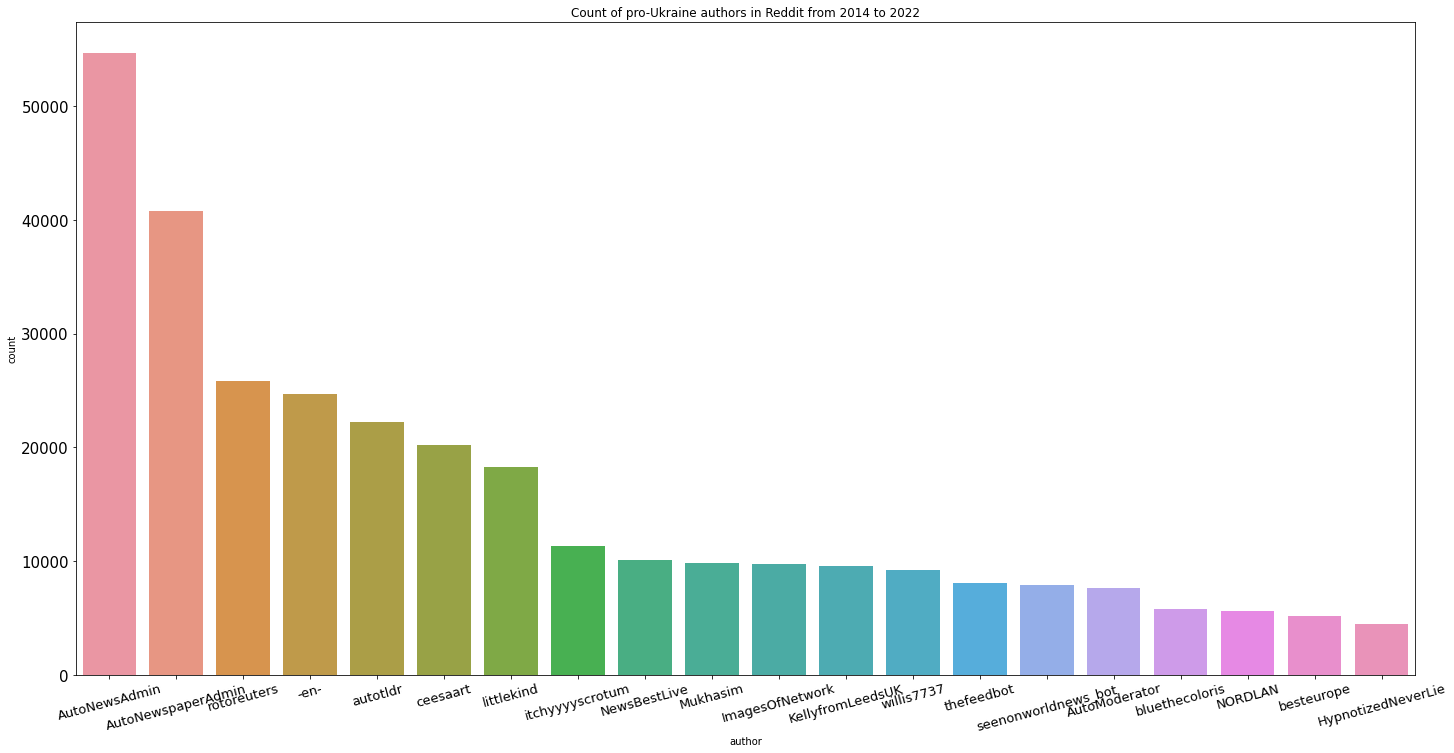

In [0]:
plt.figure(figsize=(24,12))
sns.barplot(x='author',y='author_count',data=Uk_author_pd).set(title='Count of pro-Ukraine authors in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15,size=13)
plt.yticks(size=15)
plt.ylabel('count')

plt.show()

In [0]:
all_Uk_subreddit.orderBy('subreddit_count',ascending=False).limit(20).show()

+--------------------+---------------+
 subreddit|subreddit_count|
+--------------------+---------------+
 worldnews| 362745|
 ukraine| 169650|
 UkrainianConflict| 96348|
 politics| 56501|
 europe| 53163|
UkraineWarVideoRe...| 44662|
 AutoNewspaper| 41140|
 AskReddit| 31143|
 news| 29319|
 russia| 27159|
 betternews| 25777|
 interestingasfuck| 24516|
 newsbotbot| 24459|
 CombatFootage| 23062|
 conspiracy| 23036|
 AskARussian| 22705|
 The_Donald| 22548|
 russiawarinukraine| 19971|
RussiaUkraineWar2022| 18952|
 ANormalDayInRussia| 18265|
+--------------------+---------------+

In [0]:
Uk_subreddit_pd =all_Uk_subreddit.orderBy('subreddit_count',ascending=False).limit(20).toPandas()

In [0]:
Uk_subreddit_pd

Out[72]:

,subreddit,subreddit_count
0,worldnews,362745
1,ukraine,169650
2,UkrainianConflict,96348
3,politics,56501
4,europe,53163
5,UkraineWarVideoReport,44662
6,AutoNewspaper,41140
7,AskReddit,31143
8,news,29319
9,russia,27159


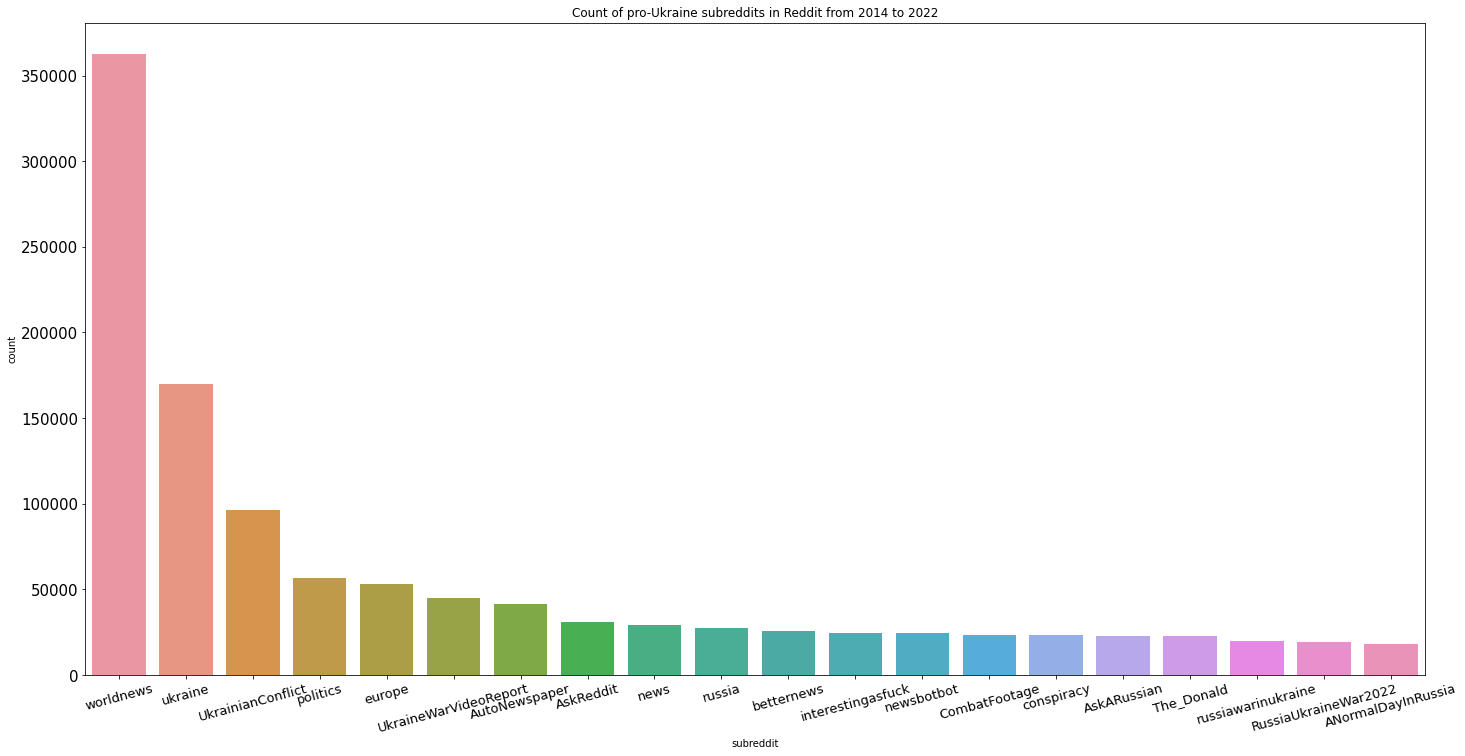

In [0]:
plt.figure(figsize=(24,12))
sns.barplot(x='subreddit',y='subreddit_count',data=Uk_subreddit_pd).set(title='Count of pro-Ukraine subreddits in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15,size=13)
plt.yticks(size=15)
plt.ylabel('count')
plt.show()

In [0]:
comment_Ru = spark.read.load("/mnt/lsde/group05/political_standpoint/comment_Ru.parquet",format="parquet")

In [0]:
submission_Ru = spark.read.load("/mnt/lsde/group05/political_standpoint/submission_Ru.parquet",format="parquet")

In [0]:
all_Ru= comment_Ru.union(submission_Ru)

In [0]:
all_Ru_author = all_Ru.groupBy('author').agg(F.count('id').alias('author_count'))
all_Ru_subreddit = all_Ru.groupBy('subreddit').agg(F.count('id').alias('subreddit_count'))
all_Ru_author.orderBy('author_count',ascending=False).limit(20).show()
Ru_author_pd =all_Ru_author.orderBy('author_count',ascending=False).limit(20).toPandas()

+-------------------+------------+
 author|author_count|
+-------------------+------------+
 AutoNewsAdmin| 26855|
 AutoNewspaperAdmin| 14791|
 -en-| 10285|
 autotldr| 9774|
 rotoreuters| 6941|
 littlekind| 6299|
seenonworldnews_bot| 6197|
 itchyyyyscrotum| 5834|
 ceesaart| 5225|
 KellyfromLeedsUK| 4076|
 thefeedbot| 3766|
 ImagesOfNetwork| 3659|
 removalbot| 3035|
 NewsBestLive| 2866|
 willis7737| 2765|
 vigorous| 2601|
 Mukhasim| 2553|
 NORDLAN| 2480|
 bluethecoloris| 2197|
 swagNextTuber| 1863|
+-------------------+------------+

In [0]:
Ru_subreddit_pd =all_Ru_subreddit.orderBy('subreddit_count',ascending=False).limit(20).toPandas()

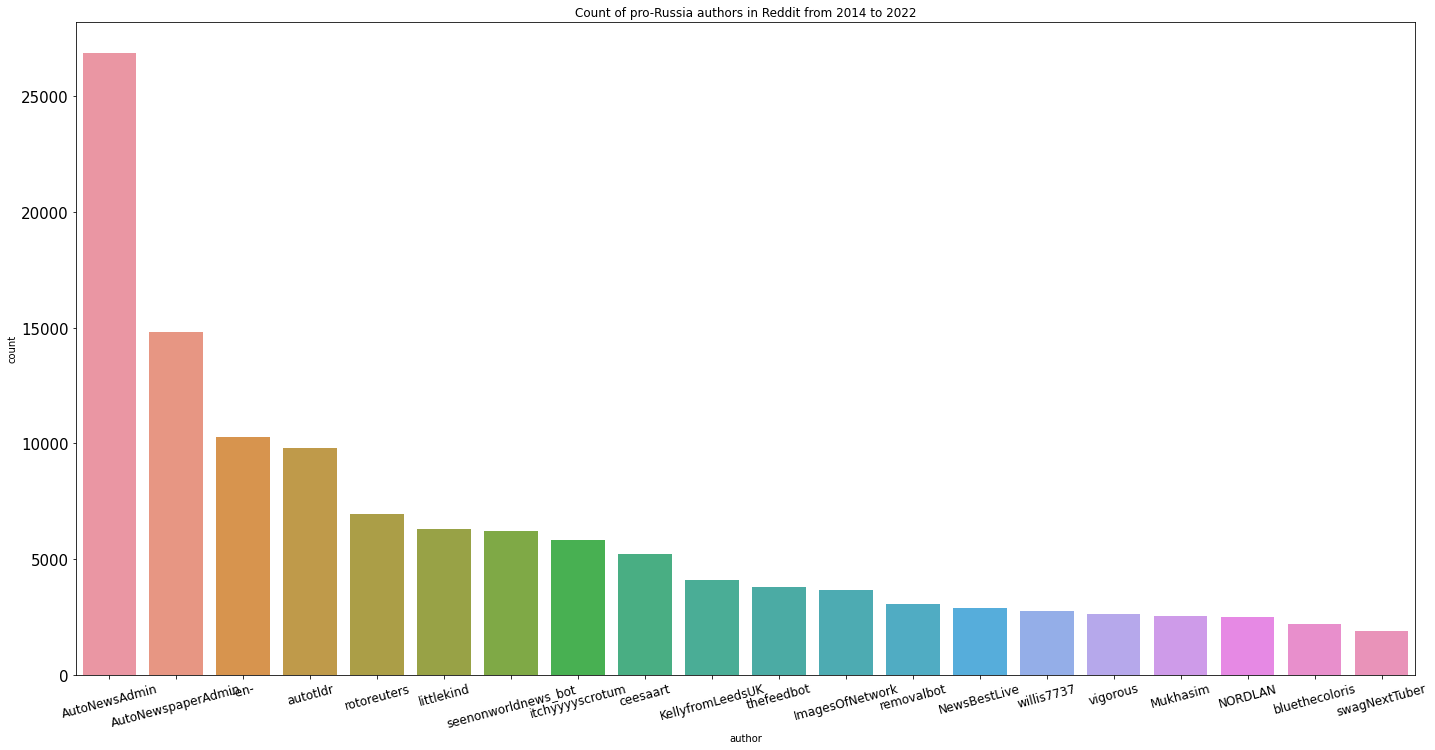

In [0]:
plt.figure(figsize=(24,12))
sns.barplot(x='author',y='author_count',data=Ru_author_pd).set(title='Count of pro-Russia authors in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15,size=12)
plt.yticks(size=15)
plt.ylabel('count')

plt.show()

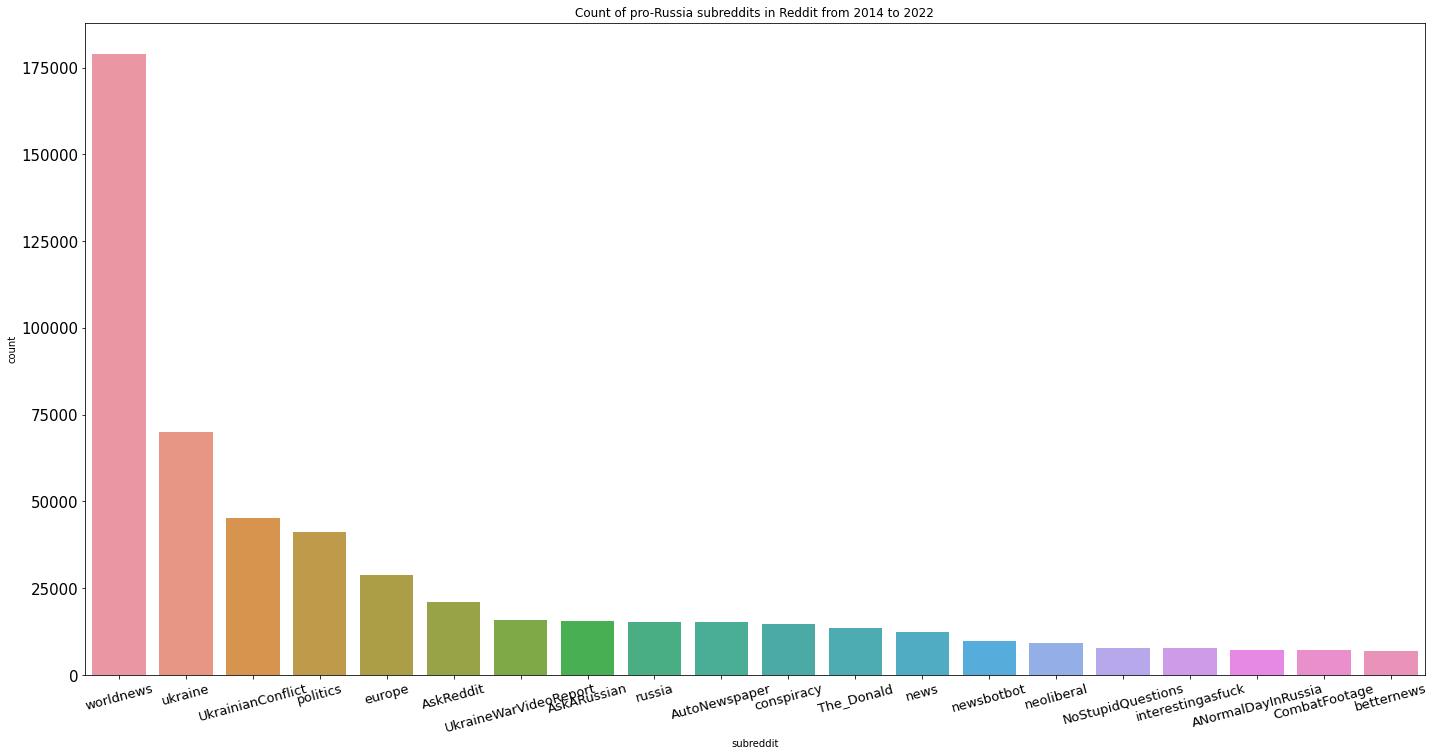

In [0]:
plt.figure(figsize=(24,12))
sns.barplot(x='subreddit',y='subreddit_count',data=Ru_subreddit_pd).set(title='Count of pro-Russia subreddits in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15,size=13)
plt.yticks(size=15)
plt.ylabel('count')
plt.show()